In [1]:
import pandas as pd
from nltk.corpus import stopwords
import string
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
# reading the dataset 
columns = ["sentiment", "id", "date", "query", "user_id", "text"]
df = pd.read_csv("twitter_new.csv", encoding="latin", names=columns)
df.head()

,sentiment,id,date,query,user_id,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [3]:
# replacing the '4' with '1' as positive sentiment
df["sentiment"] = df["sentiment"].replace(4,1)


<Axes: xlabel='sentiment', ylabel='count'>

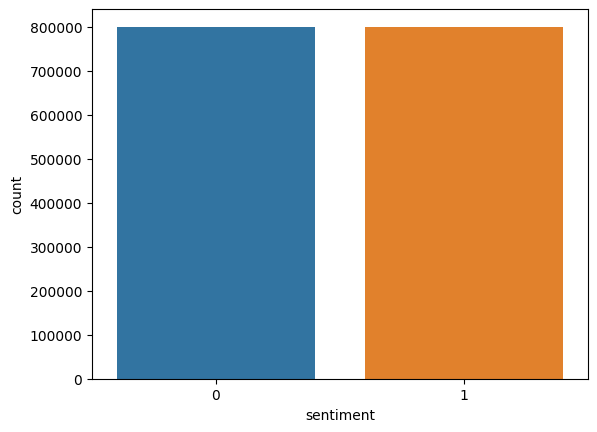

In [4]:
sns.countplot(x="sentiment",data=df)

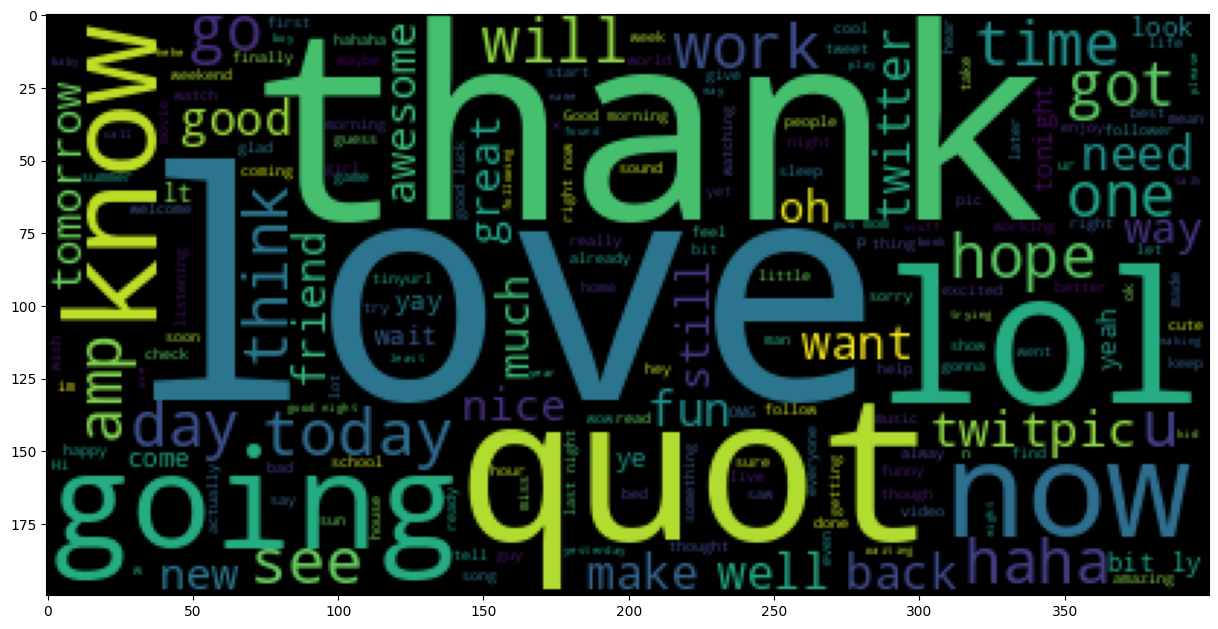

In [5]:
# creating a string of positive tweets to analyze the words
positive_tweets = df[df['sentiment'] == 1]['text'].tolist()
positive_tweets_string = " ".join(positive_tweets)
plt.figure(figsize=(15,15))
plt.imshow(WordCloud().generate(positive_tweets_string))

In [6]:
# creating the string of negative tweets to analyze the words
negative_tweets = df[df['sentiment'] == 0]['text'].tolist()
negative_tweets_string = " ".join(negative_tweets)

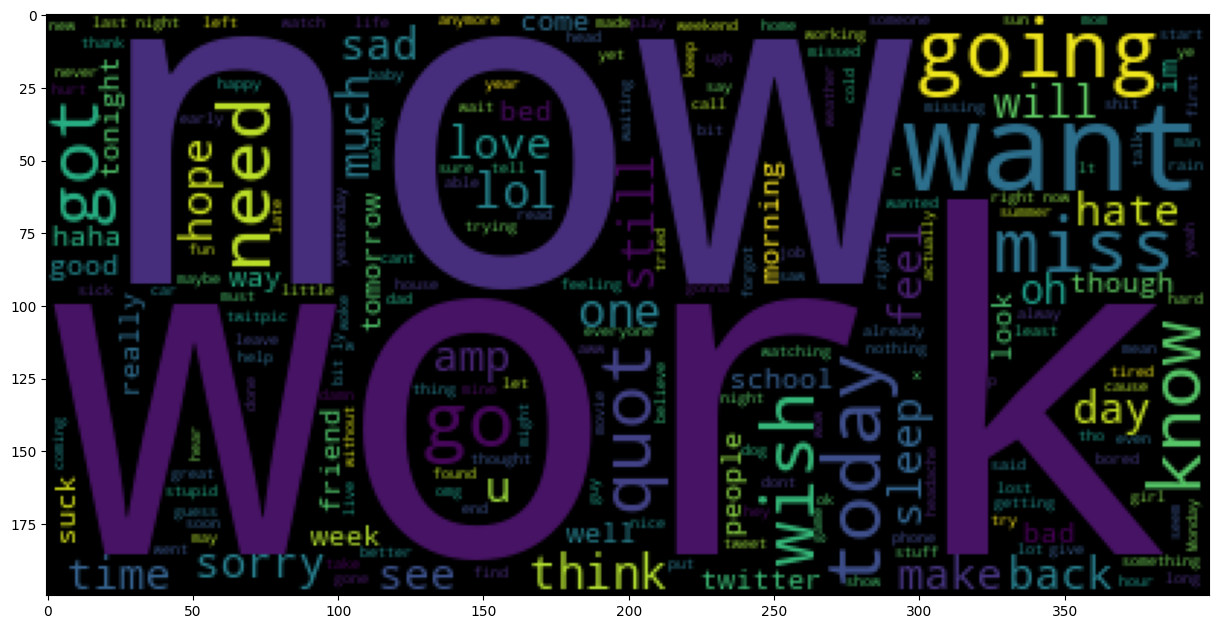

In [7]:
plt.figure(figsize=(15,15))
plt.imshow(WordCloud().generate(negative_tweets_string))

In [10]:
def convert_to_proper_tweets(tweet_text_in_improper_format):
    # removing the urls from the text
    tweet_text_in_improper_format = re.sub(r'((www.\S+)|(https?://\S+))', r"", tweet_text_in_improper_format)
    #removing the numbers from the text
    tweet_text_in_improper_format = re.sub(r'[0-9]\S+', r'', tweet_text_in_improper_format)
    #removing the tags from the text
    tweet_text_in_improper_format = re.sub(r'(@\S+) | (#\S+)', r'', tweet_text_in_improper_format)
    # removing the punctuation from the text
    tweet_without_punctuation = [char for char in tweet_text_in_improper_format if char not in string.punctuation]
    # converting the list to string
    tweet_without_punctuation = "".join(tweet_without_punctuation)
    # set of stop words
    stop_words = set(stopwords.words("english"))
    # removing the stop words
    tweet_without_stopwords = [word for word in tweet_without_punctuation.split()
                               if word.lower() not in stop_words]
    return tweet_without_stopwords

In [11]:
# extract the features using count vectorizer
vectorizer = CountVectorizer(analyzer = convert_to_proper_tweets, dtype = 'uint8')
df_countvectorizer = vectorizer.fit_transform(df['text'])
df_countvectorizer.shape

(1600000, 526933)

In [13]:
# splitting the features into train and test
## X_train, X_test, y_train, y_test = train_test_split(df_countvectorizer, df["target"], test_size=0.2, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(df_countvectorizer, df["sentiment"], test_size=0.2, random_state=0)

In [16]:
# Multinomail Naive Bayes Classifier
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB()

In [18]:
pred = classifier.predict(X_test)

In [19]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.76      0.79      0.78    159815
           1       0.78      0.75      0.77    160185

    accuracy                           0.77    320000
   macro avg       0.77      0.77      0.77    320000
weighted avg       0.77      0.77      0.77    320000

